In [1]:
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    %matplotlib inline
    import matplotlib.cm as cm
    from sklearn.decomposition import PCA
    from sklearn.manifold import TSNE
    

In [2]:
print('\nLoading files ...')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
X = train.drop(['id', 'target'], axis=1).values
y = train['target'].values.astype(np.int8)
target_names = np.unique(y)
print('\nThere are %d unique target valuess in this dataset:' % (len(target_names)), target_names)


Loading files ...

There are 2 unique target valuess in this dataset: [0 1]


In [3]:
n_comp = 20
print("\nRunning PCA")
pca = PCA(n_components = n_comp, svd_solver = 'full', random_state=1001)
X_pca = pca.fit_transform(X)
print("Explained variance: %.4f" % pca.explained_variance_ratio_.sum())
print("Individual variance contributions:")
for j in range(n_comp):
    print(pca.explained_variance_ratio_[j])


Running PCA
Explained variance: 0.9944
Individual variance contributions:
0.9077327018849173
0.025423406321501658
0.011033728952072606
0.007026875356199505
0.006283416003140613
0.006119747729235831
0.005358647266808212
0.004532740198131313
0.0036293073197562376
0.0029426228826479727
0.0023924601214410477
0.001774643302319553
0.0016665349075175744
0.001511857372278015
0.0014828537818274488
0.0012950139999157162
0.001205214813472617
0.0010727631061984715
0.0010395290634899548
0.0008415527677793368


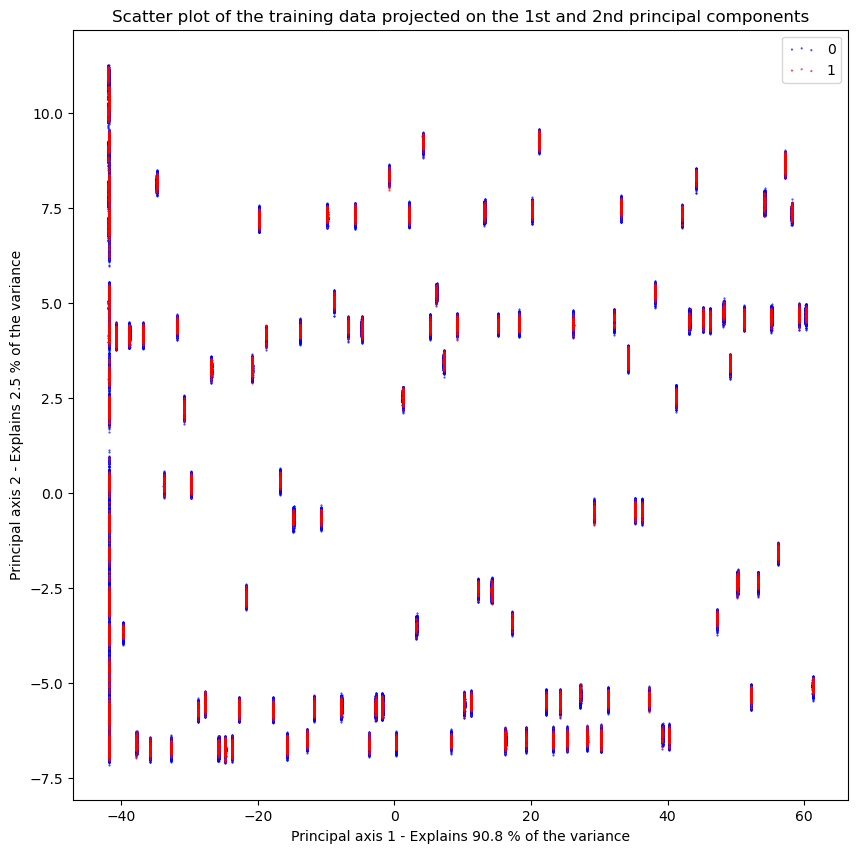

In [4]:
colors = ['blue', 'red']
plt.figure(1, figsize=(10, 10))

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, s=1,
                alpha=.8, label=target_name, marker='.')
plt.legend(loc='best', shadow=False, scatterpoints=3)
plt.title(
        "Scatter plot of the training data projected on the 1st "
        "and 2nd principal components")
plt.xlabel("Principal axis 1 - Explains %.1f %% of the variance" % (
        pca.explained_variance_ratio_[0] * 100.0))
plt.ylabel("Principal axis 2 - Explains %.1f %% of the variance" % (
        pca.explained_variance_ratio_[1] * 100.0))

plt.savefig('pca-porto-01.png', dpi=150)
plt.show()


If my zeros and ones are properly segregated in this graph, this would mean that the data is not at all complex. So we can use a Linear Regression Classifier or a Decision Tree Classifier, and get the same accuracy as any of the those metrics would have.

From the above plot it is very clear that our data is not that linearly separable and it is complex.

In [5]:
from sklearn.preprocessing import MinMaxScaler

def scale_data(X, scaler=None):
    if not scaler:
        scaler = MinMaxScaler(feature_range=(-1, 1))
        scaler.fit(X)
    X = scaler.transform(X)
    return X, scaler

X = train.drop(['id', 'target'], axis=1)
test.drop(['id'], axis=1, inplace=True)
n_train = X.shape[0]
train_test = pd.concat((X, test)).reset_index(drop=True)
col_to_drop = X.columns[X.columns.str.endswith('_cat')]
col_to_dummify = X.columns[X.columns.str.endswith('_cat')].astype(str).tolist()

for col in col_to_dummify:
    dummy = pd.get_dummies(train_test[col].astype('category'))
    columns = dummy.columns.astype(str).tolist()
    columns = [col + '_' + w for w in columns]
    dummy.columns = columns
    train_test = pd.concat((train_test, dummy), axis=1)

train_test.drop(col_to_dummify, axis=1, inplace=True)
train_test_scaled, scaler = scale_data(train_test)
X = np.array(train_test_scaled[:n_train, :])
test = np.array(train_test_scaled[n_train:, :])
print('\n Shape of processed train data:', X.shape)
print(' Shape of processed test data:', test.shape)


 Shape of processed train data: (595212, 227)
 Shape of processed test data: (892816, 227)


Using PCA, you can analyze that wether your clusters are properly segregated or not.

Decision tree is one level non-linear. It is able to get non-linearity but only to a certain extent.

Mostly used algorithms used by Data Scientists and Kagglers, XGBoost and LightGBM. LightGBM is incorporated Microsoft. Personal GBM Model. It has some inherent optimizations. They have added regularization in LightGBM, so it is less known to overfitting, and lets you achieve higher level of accuracy in your dataset. More robust for large dataset.

On the other hand you have XGBoost, which is again an improvement over the existing sklearn gbm implementation.

Data Science is more of an Art than of Science

Beauty of using XGBoost, it gives you the implementation of using Data Engineering. It will help you get your data production ready if you use XGBoost Trees as well


Like, if you want to do Feature Engineering, look at the feature importance graph and choose the features which have a value more than a threshold and choose them